 - y_0(t) = position at time t from data
 - Get velovocity and acceleration
 - v(t) =(ish) (y(t-delta_t)- y(t+delta_t))/(2*delta_t) ~~ central differential ~~ first derivitive
 - a(t) = (y(delta_t+t)-2*y(t)+y(t-delta_t))/delta_t**2 ~~ second derivitative

- You can get a higher accuracy with a larger stencle
- Stencles can be asymetric or up winded (larger error usually )

### New Notation
t= t_0, t_1, ...t_n =t_0+ delta_t * n
u(t_n)=U_n <- at time t_n

### Finite Differental
U'_n=(estimate) (U_n+1 -U_n) / delta_n +> Error = U'_n=(estimate) (U_n+1 -U_n) / delta_n

### Taylor Series
 U_n+1 = U_n +U_n'*delta_t + 1/2 * U_n'' *delta_t **2 +O(delta_t**3)
       -U_n
            +U_n'*delta_t + 1/2 * U_n'' *delta_t **2 +O(delta_t**3)
 (times) 1/delta_t
            +U_n' + 1/2 * U_n'' *delta_t  +O(delta_t**3)
   (minus) U_n'
                  + 1/2 * U_n'' *delta_t  +O(delta_t**3)

                    Errors proportional to delata_t

- U_n' (aprox) U_n+1 - U_n / delata_t = delta_t sized errors

- U_n' (aprox) U_n+1 - U_n-1 / 2*delata_t
### Taylor series
    - U_n+1 =  U_n + U_n'*delta_t + 1/2 * U_n'' * delta_t **2 + 1/3! * U_n''' * delta_t **3 O(delta_t**4)
    - U_n-1    U_n - U_n'*delta_t + 1/2 * U_n'' * delta_t **2 - 1/3! * U_n''' * delta_t **3 O(delta_t**4)
##### Subtract
    - U_n-1       2* U_n'*delta_t                             + 2/3! * U_n''' * delta_t **3
##### Mult 1/2 delta_t
    - U_n' + 1/3! *U_n'''* delta_t**2 +O(delta_t**4)
##### Subtract U_n'
    - 1/3! *U_n'''* delta_t**2 +O(delta_t**4)
##### We see errors go to delta T **2

### Drag Force
 - Resistance of a downward forces
 - There will become a time where F_d (force of drag) = -mg
 - F-d = C_1 * V
 - F_d = C_2 * V**2
    - What we ss is that the exponent can change - Phenominical Logical laws

- Free Fall -mg + F_d = 0
- -mg + C_1*V_t=0
- C_1 = mg/v_t
- -mg + C_2*V_t**2=0
- C_2 = mg/v_t**2
### Newtons Law
- m*a = -m*g + F_d
    - -mg + C_1*V
    - -mg + mg/V_t *V
- ma = -mg(1-v/v_t)
- a = -g (1-v/v_t)

- m*a = -m*g + F_d
    - -mg + C_2*V**2
    - -mg + mg/V_t**2 *V**2
- ma = -mg(1-v**2/v_t**2)
- a = -g (1-v**2/v_t**2)

#### Functions the returns two perams
- returns acceleration -g (1-(V/V_t)**(alpha))
- proposal accatance rate 20%
- log likly hood = -1/2 (sum) yi_m
- scipy interpolate
- constrain the bounds - priors ie alpha

# Falling Coffee Filter

The discussion on this notebook follows the text pretty closely until the end. Refer to pages 59 (bottom) through 63.

The following data were collected, tracking a coffee filter that was released to fall under the influence of gravity. You will soon learn the data have many of the complexities of real data with errors. First off, note the first time is not zero. Also note that you can assume the $\Delta t$ is about 0.0247 and not variable (even though it does vary).

`
//Falling coffee filter
//Time ( s )	Position ( m )
0.2055	0.4188
0.2302	0.4164
0.255	0.4128
0.2797	0.4082
0.3045	0.4026
0.3292	0.3958
0.3539	0.3878
0.3786	0.3802
0.4033	0.3708
0.428	0.3609
0.4526	0.3505
0.4773	0.34
0.502	0.3297
0.5266	0.3181
0.5513	0.3051
0.5759	0.2913
0.6005	0.2788
0.6252	0.2667
0.6498	0.2497
0.6744	0.2337
0.699	0.2175
0.7236	0.2008
0.7482	0.1846
0.7728	0.1696
0.7974	0.1566
0.822	0.1393
0.8466	0.1263
`

### Problem 1

Cut and paste the data into a file. Read the file and plot the positions as a function of time.



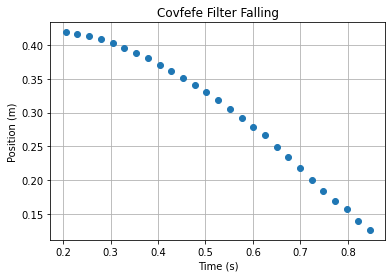

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
true_time = []
true_pos = []

with open('covfefe_gate.txt') as f:
    for line in f:
        if '//' in line:
            continue
        temp = line.split()
        true_time.append(float(temp[0]))
        true_pos.append(float(temp[1]))
true_time = np.array(true_time)
true_pos = np.array(true_pos)
delta_t = true_time[1:]-true_time[:-1]

plt.title("Covfefe Filter Falling")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.plot(true_time,true_pos,'o')
plt.grid()
plt.show()


## Computing derivatives

As you are seeing in class, derivatives of quantities are critical to our understanding of the world. With position data, we can find velocity and acceleration from derivatives. A good balance between accuracy and simplicity is achieved with central finite differencing schemes. The formulas are as follows

$$v(t) = \frac{y(t + \Delta t) - y(t - \Delta t)}{2\Delta t}$$

and for acceleration

$$a(t) = \frac{y(t + \Delta t) - 2y(t) + y(t - \Delta t)}{\Delta t^2}.$$

### Problem 2
Determine both first and second derivatives of position; velocity and acceleration respectively. Plot them. Give careful thought to what the values on the time axis should be. Make clear distinctions between the points the derivatives are computed at and the lines connecting them. Label axes. Estimate, by inspection, the terminal velocity of the coffee filter. Comment on any unusual features you see in the data. Finally, plot $a$ vs $v$ and see if that provides addition insight into the terminal velocity.


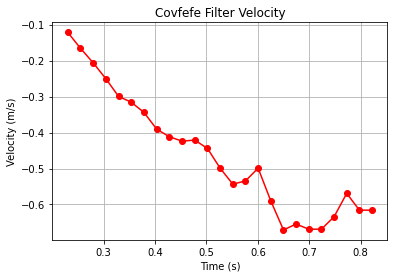

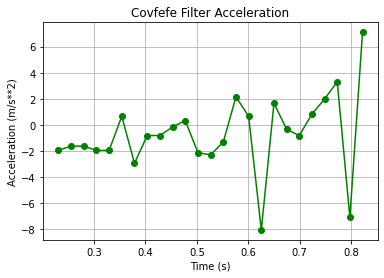

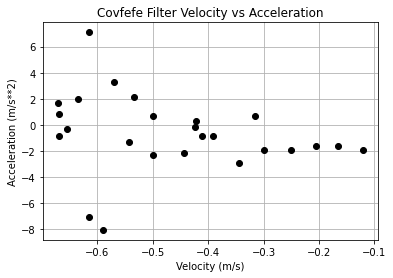

In [26]:
def first_cfd (y,t):
    return (y[2:]-y[:-2])/(t[2:]-t[:-2])

def second_cfd (y,t):
    return (y[2:]-2*y[1:-1]+y[:-2])/((t[2:]-t[:-2])/2)**2

v = (first_cfd(true_pos,true_time))
a = (second_cfd(true_pos,true_time))
t = np.cumsum(((true_time[2:]-true_time[:-2])/2))+true_time[0]

plt.plot(true_time[1:-1],v,'ro-')
plt.grid()
plt.title("Covfefe Filter Velocity")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.show()
plt.plot(true_time[1:-1],a,'go-')
plt.grid()
plt.title("Covfefe Filter Acceleration")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s**2)")
plt.show()

plt.plot(v,a,'ko')
plt.grid()
plt.title("Covfefe Filter Velocity vs Acceleration")
plt.xlabel("Velocity (m/s)")
plt.ylabel("Acceleration (m/s**2)")
plt.show()


Center finite difference Start ode solver with 2nd position and 1st velovity

### Friction on a falling body

The role of friction on a falling body can generally be modeled with the simple modification of Newton's Second Law. Assume there is another force, friction, that opposes motion. Now there are two forces, gravity pulling the object down, and friction, pushing the object back up. We call the frictional forces *drag*. It can be modeled as

$$F_d = C_1v$$

or 

$$F_d = C_2v^2$$ 

depending on the speed and diameter of the objects. 

These are *phenomenological laws* - they have been found to work through experimentation, but their range of validity is small.

Eventually, terminal velocity is reached. This is the point where the drag resistance is equal to gravity and the object's speed no longer changes.

$$ mg = C_1 v_t \rightarrow C_1 = \frac{mg}{v_t}$$

and for quadratic drag

$$ mg = C_2 v_t^2 \rightarrow C_2= \frac{mg}{v_t^2}$$

While just minor algebra, these expression relate the constants in terms of things you can measure - the terminal velocity

$$F_d = \frac{mg}{v_t}v$$

and

$$F_d = mg \left(\frac{v}{v_t}\right)^2.$$ 

We're close to completion. Finally, write the complete balance of forces for a falling body with friction

$$F = -mg\left(1 - \frac{v}{v_t}\right)$$

and

$$F = -mg\left(1 - \left(\frac{v}{v_t}\right)^2\right)$$ 

#### Problem 3
Chose the appropriate numerical algorithm from last week to integrate the system of ODEs resulting from both linear and quadratic drag forces. Experiment with the values of $v_t$ to try and get the best possible fit to the data. Comment on which of the two drag relations appears to work better.


### The Linear equation appears to fit compaired to the quadratic

In [27]:
def coffeefilter(t,y,g,alpha,v_t):

    a = -g*(1-(y[1]/v_t)**alpha)
    return np.array([y[1],a])

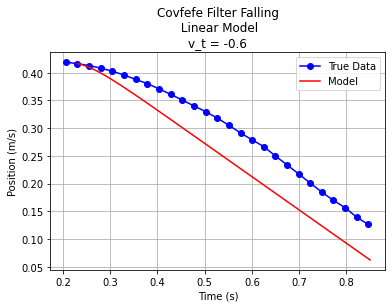

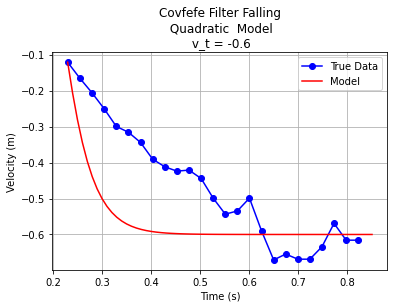

In [35]:
def Euler(f,dt,t,y,args):
    """
    given y(t)
    :return: y(t+delta_t)
    """
    return y + f(t,y,*args)* dt

def EulerCromer(f,dt,t,y,args):
    y_end = Euler(f,dt,t,y,args)
    return y + f(t+dt,y_end,*args) * dt


def EulerRichardson(f,dt,t,y,args):
    y_mid = Euler(f,dt,t+dt/2,y,args)
    return y + f(t+dt/2,y_mid,*args) * dt


def solve_ode(f,tspan, y0, method = Euler, *args, **options):
    t_0 = tspan[0]
    t_f = tspan[1]
    d_t = options['first_step']
    t= [t_0]
    y = [y0]

    while t[-1]<= t_f:
        y.append(method(f,d_t,t[-1],y[-1],args))
        t.append(t[-1]+d_t)
    return np.array(t),np.array(y)

t_0 = true_time[1]
t_f = true_time[-1]
y_0 = [true_pos[1],v[0]]
v_0 = v[0]
g = 9.8
alpha = 2
d_t = .01

v_t = -.6
# You should be able to do better than I have below.

t_e,y_e = solve_ode(coffeefilter,[t_0,t_f],y_0,EulerRichardson,*[g,alpha,v_t],first_step=d_t)

plt.plot(true_time,true_pos,'bo-',label='True Data')
plt.plot(t_e,y_e[:,0],'r',label="Model")
plt.legend()
plt.title("Covfefe Filter Falling\n Linear Model\nv_t = {}".format(v_t))
plt.xlabel("Time (s)")
plt.ylabel("Position (m/s)")
plt.grid()
plt.show()

plt.plot(true_time[1:-1],v,'bo-',label='True Data')
plt.plot(t_e,y_e[:,1],'r',label="Model")
plt.legend()
plt.title("Covfefe Filter Falling\n Linear  Model\n v_t = {}".format(v_t))
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m)")
plt.grid()
plt.show()

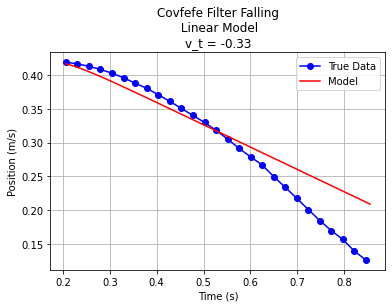

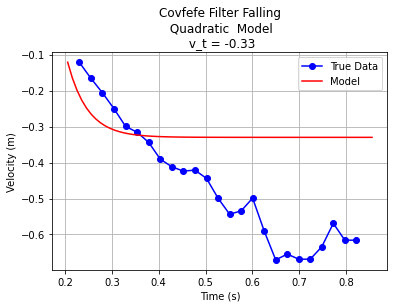

In [34]:
alpha = 1
d_t = .01

v_t = -.33
# You should be able to do better than I have below.

t_e,y_e = solve_ode(coffeefilter,[t_0,t_f],y_0,EulerRichardson,*[g,alpha,v_t],first_step=d_t)

plt.plot(true_time,true_pos,'bo-',label='True Data')
plt.plot(t_e,y_e[:,0],'r',label="Model")
plt.legend()
plt.title("Covfefe Filter Falling\n Quadratic Model\nv_t = {}".format(v_t))
plt.xlabel("Time (s)")
plt.ylabel("Position (m/s)")
plt.grid()
plt.show()

plt.plot(true_time[1:-1],v,'bo-',label='True Data')
plt.plot(t_e,y_e[:,1],'r',label="Model")
plt.legend()
plt.title("Covfefe Filter Falling\n Quadratic  Model\n v_t = {}".format(v_t))
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m)")
plt.grid()
plt.show()





### Generalization of drag force

While 'low' and 'high' speeds are not well characterized, and it's not easy to decide which applies to the coffee filter, it is possible to generalize what we don't know and systematically explore it. 

Let us suppose the coffee filter is in the process of transitioning from a linear to a quadratic drag force. Write the balance of forces on the falling body as:

$$F = -mg\left( 1 - \left( \frac{v}{v_t}\right)^{\alpha} \right)$$

#### Problem 4
Code up this generalized drag force and plot the results of the ODE solver on the same axes as the position data. Through visual inspection, come up with the best fit you can.

#### An alpha value around .1 seems to be the best values at this point

In [42]:
def falling(t,y,g,v,alpha):
    return np.array([y[1],-g*(1-(y[1]/v))**(1/alpha)])

<ipython-input-42-be2050f28ba0>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return np.array([y[1],-g*(1-(y[1]/v))**(1/alpha)])


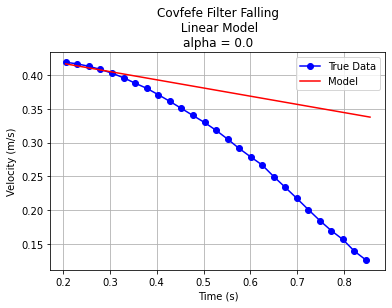

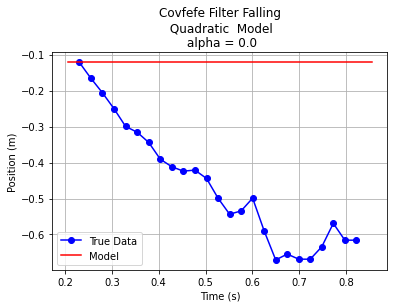

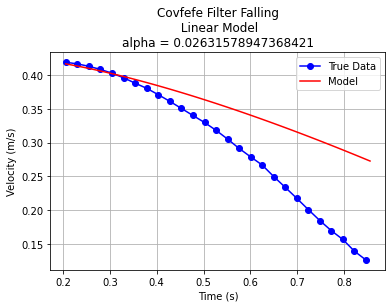

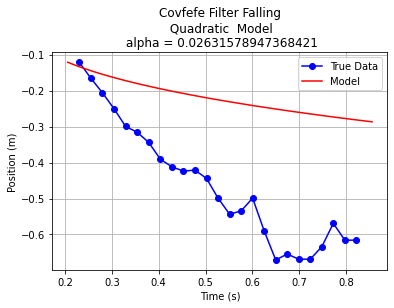

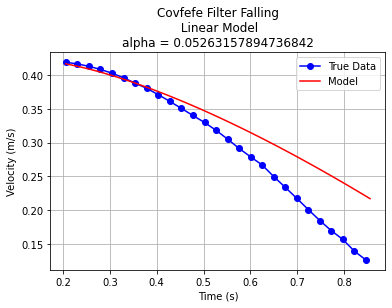

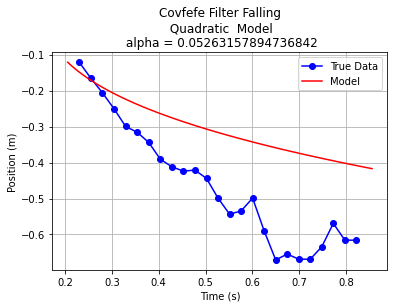

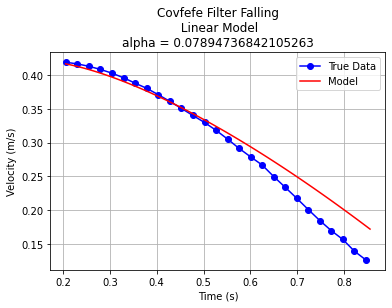

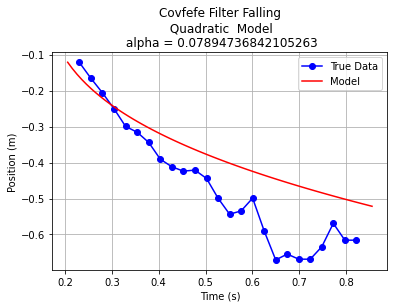

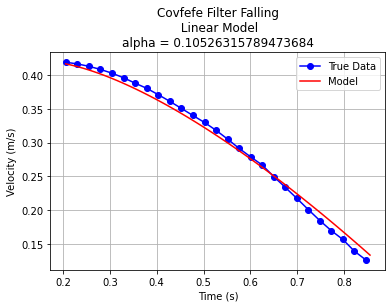

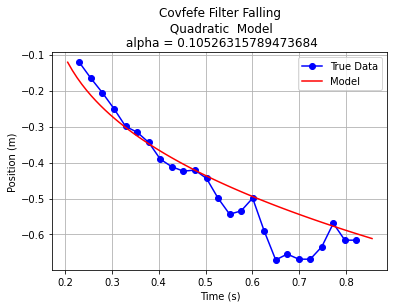

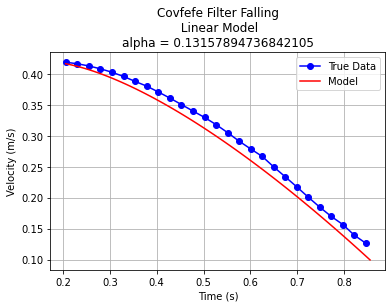

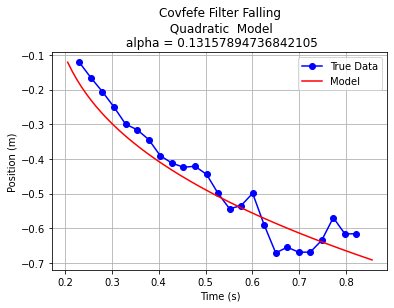

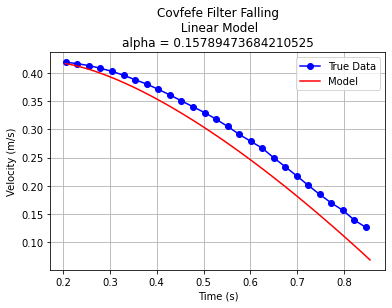

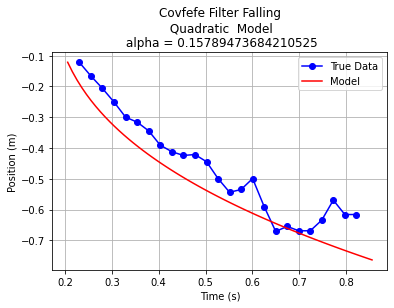

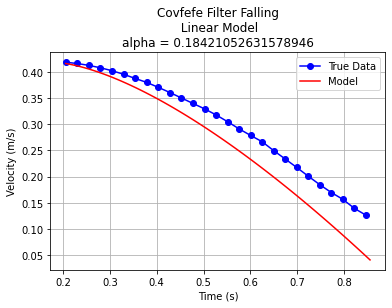

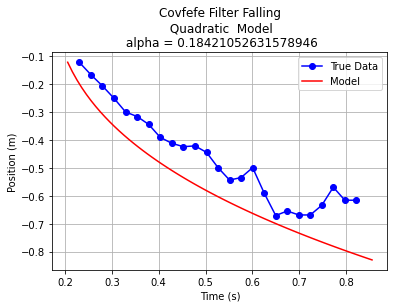

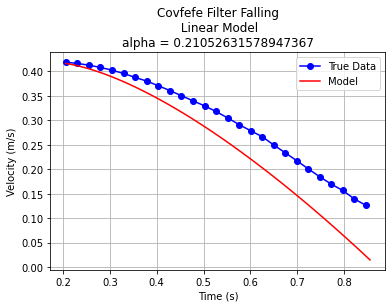

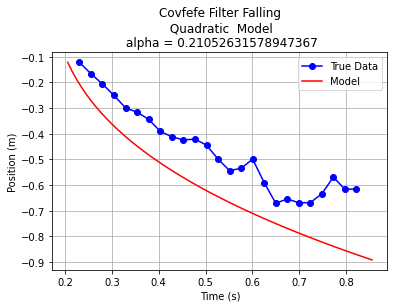

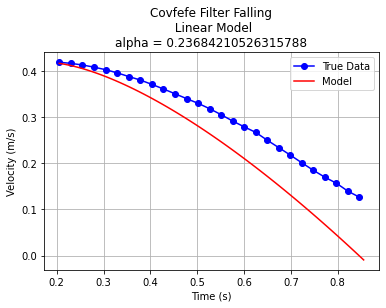

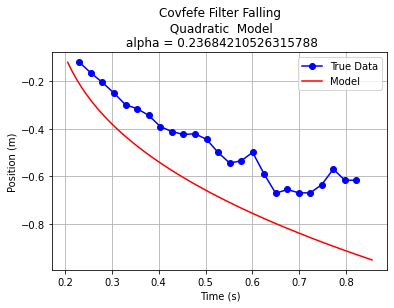

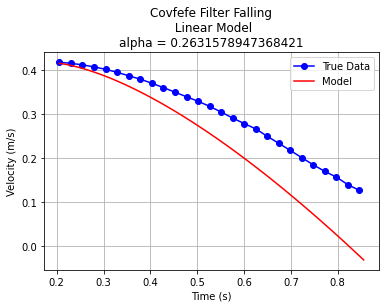

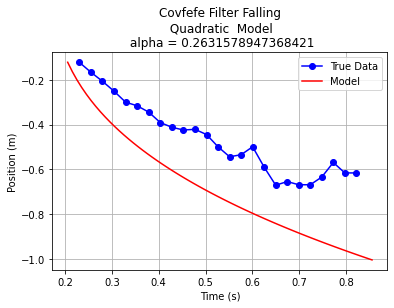

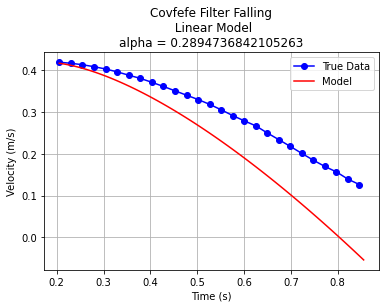

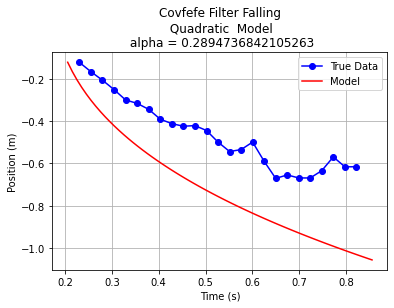

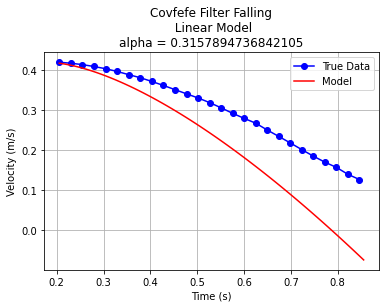

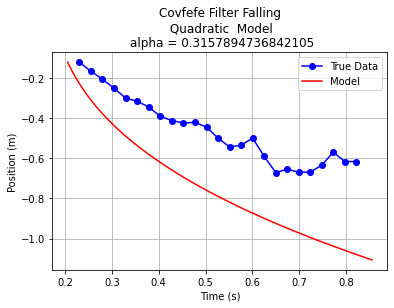

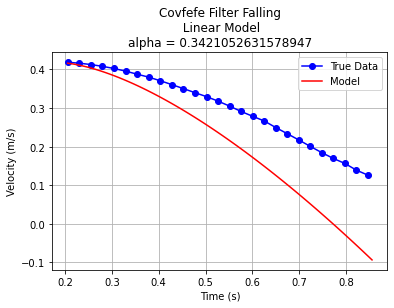

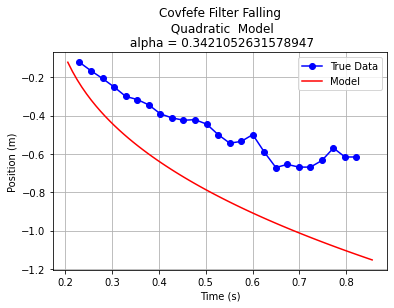

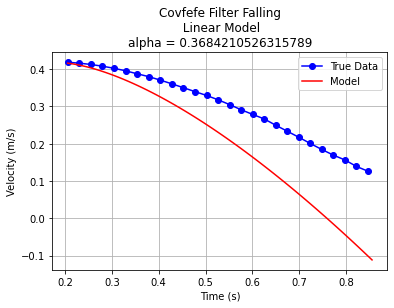

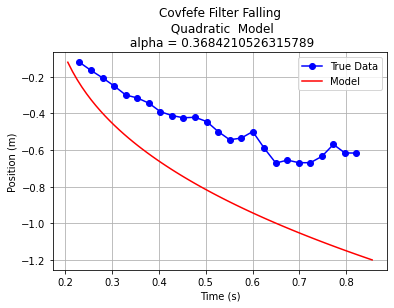

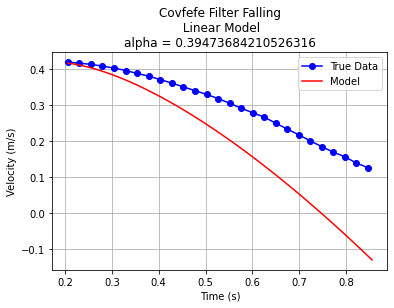

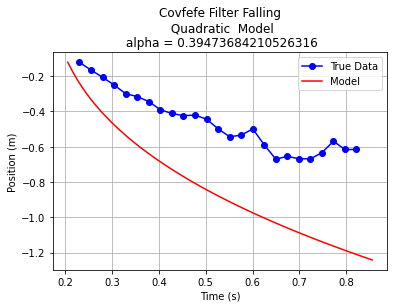

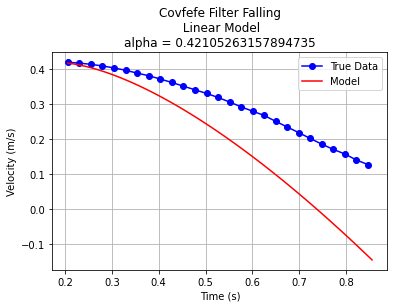

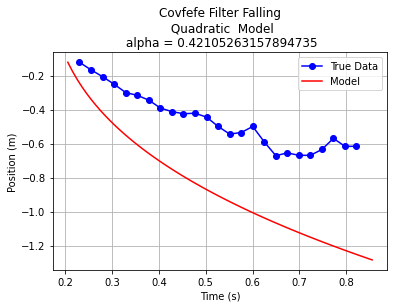

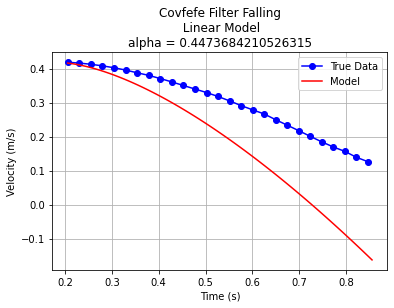

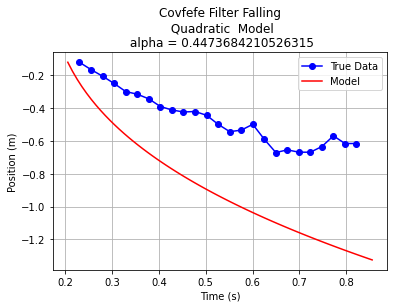

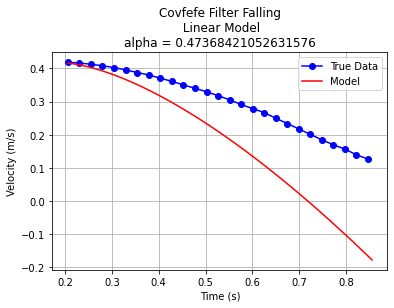

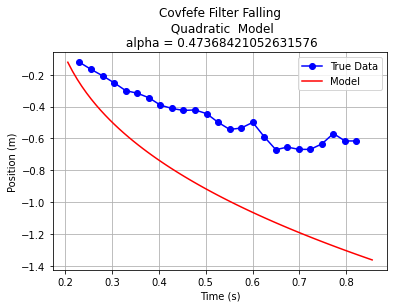

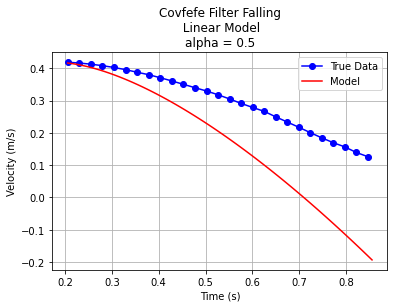

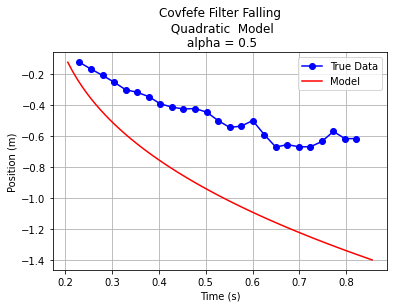

In [44]:
t_0 = true_time[0]
t_f = true_time[-1]
y_0 = [true_pos[1],v[0]]
v_0 = v[0]
g = 9.8
v_t= -.6
d_t = .01

for alpha in np.linspace(0,.5,20):
    t_e,y_e = solve_ode(falling,[t_0,t_f],y_0,EulerRichardson,*[g,alpha,v_t],first_step=d_t)

    plt.plot(true_time,true_pos,'bo-',label='True Data')
    plt.plot(t_e,y_e[:,0],'r',label="Model")
    plt.legend()
    plt.title("Covfefe Filter Falling\n Linear Model\nalpha = {}".format(alpha))
    plt.xlabel("Time (s)")
    plt.ylabel("Velocity (m/s)")
    plt.grid()
    plt.show()

    plt.plot(true_time[1:-1],v,'bo-',label='True Data')
    plt.plot(t_e,y_e[:,1],'r',label="Model")
    plt.legend()
    plt.title("Covfefe Filter Falling\n Quadratic  Model\n alpha = {}".format(alpha))
    plt.xlabel("Time (s)")
    plt.ylabel("Position (m)")
    plt.grid()
    plt.show()



### Problem 5

Finally, return to your MCMC machinery and apply it to this problem. Use it to determine the optimal values of both $\alpha$ and $v_t$. Also determine the distributions for each variable. Finally, plot $\alpha$ vs. $v_t$ and see if you can witness the chain converging about the best parameters, and the exploration of the space around the optimal parameters. Plot the results of running the simulations with both the most likely as well as the average values of $v_t$ and $\alpha$. Comment on all of these plots with a specific mind to the question of how well the parameters fit the distribution, and how much uncertainty there is in the parameters.

Some helpful parameters include:
* use step sizes for 0.01 $\alpha$ and $v_t$.
* use a $\sigma^2$ in the log likelihood function value of .0001. Based on the data, say why is this value reasonable?
* create bounds on the variables based on your previous explorations. These should prevent the search from going outside a specified range. This is a form of including *priors* in the simulation.
* Do 20,000 burn in steps and 80,000 steps.
* Sample every 500 points in the chain.
* Start the process with $\alpha$ = $v_t$ = 1.0.

Some general hints include:
* The log likelihood function is $-\frac{1}{2}\sum_i \left ( y_i^o - y_i^m \right )^2/\sigma^2$ where $i$ are the individual data points (positions only), $y_i^o$ is the observed data point, and $y_i^m$ is a modeled data point.
* Make sure the modeled data points are at the same times as the observed ones. Perhaps use interpolation?
* Keep track of the acceptance rate. You should be around 23% with the parameters provided.


1 -1.0
Burn in  0.7913 0.10470694755247115 -0.91705525154058
Done?  0.69254 0.06837595671439561 -1.4585457088614486
0.06837595671439561 -1.4585457088614486


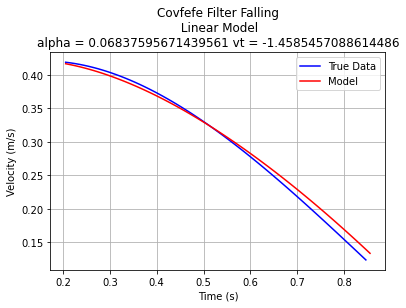

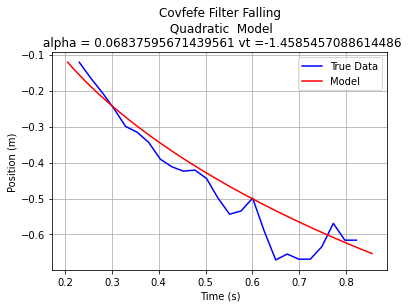

In [32]:
data=[]
total = 0
step_size = .01
sigma = .001
fit = np.polyfit(true_time,true_pos,3)
times = np.linspace(t_0,t_f,66)
y_val = np.polyval(fit,times)
d_t = .01




def log_like(alpha,v_t):
    _,y_e = solve_ode(coffeefilter,[t_0,t_f],y_0,EulerRichardson,*[g,alpha,v_t],first_step=d_t)
    return -.5*(np.linalg.norm(y_val - y_e[:,0])**2)/sigma

# def propose(alpha,v_y):
#     a,v = norm
def proposed_change(alpha,v_t):
    a= np.random.uniform(-step_size,step_size)+alpha
    v = np.random.uniform(-step_size,step_size)+v_t
    while a <.01 or a >2. or v>-.01 or v<-1.5:
        a= np.random.uniform(-step_size,step_size)+alpha
        v = np.random.uniform(-step_size,step_size)+v_t

    return a,v

def mcmc(alpha,v_t,burn_in=True):
    global total
    alpha_p, v_t_p =proposed_change(alpha,v_t)
    w = np.log(np.random.rand())

    result = min(0,log_like(alpha_p,v_t_p)-log_like(alpha,v_t))
    # print(result, alpha,alpha_p,v_t,v_t_p)
    if w<result:
        alpha=alpha_p
        v_t = v_t_p
        total =total +1
    if not burn_in:
        data.append([alpha,v_t])
    return alpha,v_t,

v_t = -1.
alpha = 1
burn_in_count = 20000
print(alpha,v_t)
for i in range(burn_in_count):
    alpha,v_t= mcmc(alpha,v_t)


print("Burn in ",total/burn_in_count,alpha,v_t)
for i in range(80000):
    alpha,v_t= mcmc(alpha,v_t,False)


print("Done? ",total/100000,alpha,v_t)
t_e,y_e = solve_ode(coffeefilter,[t_0,t_f],y_0,EulerRichardson,*[g,alpha,v_t],first_step=d_t)

plt.plot(times,y_val,'b-',label='True Data')
plt.plot(t_e,y_e[:,0],'r',label="Model")
plt.legend()
plt.title("Covfefe Filter Falling\n Linear Model\nalpha = {} vt = {}".format(alpha,v_t))
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.grid()
plt.show()

plt.plot(true_time[1:-1],v,'b-',label='True Data')
plt.plot(t_e,y_e[:,1],'r',label="Model")
plt.legend()
plt.title("Covfefe Filter Falling\n Quadratic  Model\n alpha = {} vt ={}".format(alpha,v_t))
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.grid()
plt.show()

print(alpha,v_t)



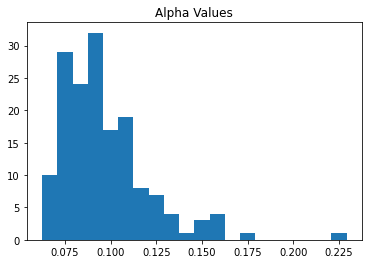

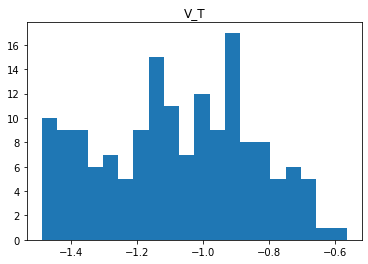

Alpha Standard Dev 0.02318749894038447
V_T Standard Dev 0.22840099634331631


In [46]:
hist, bins = np.histogram(np.array(data)[::500,0])
plt.hist(np.array(data)[::500,0],bins=20)
plt.title("Alpha Values")
plt.show()
plt.hist(np.array(data)[::500,1],bins=20)
plt.title("V_T")
plt.show()
print(f"Alpha Standard Dev {np.std(np.array(data)[:,0])}")
print(f"V_T Standard Dev {np.std(np.array(data)[:,1])}")

- When looking at the V_T histogram it appears to have two local maximas one around -1 and the other where the mcmc steps estimated the value to be around -1.4

- THe alpha value is more obvious that the best fit value is around .07
- The V_T has a std dev of .22 where the alpha value is around a .02